# Sample file to generate partition on an articles using Community Detection
* Input - article text
* Output - partition assignment
* author: harin

In [2]:
import pandas as pd
import numpy as np
import spacy

In [3]:
file = open('../data/raw/2018_07_19_04_59_08/articles.txt', 'r', encoding = 'utf8')

In [5]:
articles_dt = file.read().split('\n')[:-1]
pubId, canonicalUrl,firstScrape,title,text = [],[],[],[],[]

for article in articles_dt:    
    row = article.split('\t')
    pubId.append(row[0])
    canonicalUrl.append(row[4])
    firstScrape.append(row[5])
    title.append(row[8])
    text.append(row[9])

articles_df = pd.DataFrame()
articles_df['pubId'] = pubId
articles_df['canonicalUrl'] = canonicalUrl
articles_df['firstScrape'] = firstScrape
articles_df['title'] = title
articles_df['text'] = text

In [6]:
articles_df.shape

(213605, 5)

In [7]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity

nlp = spacy.load("en_core_web_sm")
sample_df = articles_df.sample(n=1000)
docs = list(nlp.pipe(sample_df.text))
embs = [doc.vector for doc in docs]

embs_df = pd.DataFrame(embs)
embs_df = embs_df.dropna()
cs = cosine_similarity(embs_df)

# Construct graph

In [8]:
cs

array([[1.        , 0.84133512, 0.83598746, ..., 0.88781348, 0.82373229,
        0.64549801],
       [0.84133512, 1.        , 0.94511449, ..., 0.89897038, 0.91105358,
        0.84300969],
       [0.83598746, 0.94511449, 1.        , ..., 0.92706507, 0.92206387,
        0.85250264],
       ...,
       [0.88781348, 0.89897038, 0.92706507, ..., 1.        , 0.87410738,
        0.76918637],
       [0.82373229, 0.91105358, 0.92206387, ..., 0.87410738, 1.        ,
        0.84060022],
       [0.64549801, 0.84300969, 0.85250264, ..., 0.76918637, 0.84060022,
        1.        ]])

In [9]:
import networkx as nx
import community
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
G = nx.Graph()

In [11]:
threshold = 0.5

In [12]:
G.add_edge(1, 2)

In [13]:
for i in range(len(cs)):
    similarities = cs[i]
    for j, sim in enumerate(similarities):
        if i == j: continue
        if sim > threshold:
            G.add_edge(i, j)

C:\Users\harinsa\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


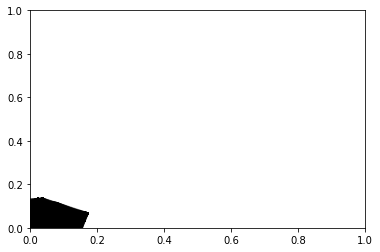

In [14]:
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, alpha=0.5)

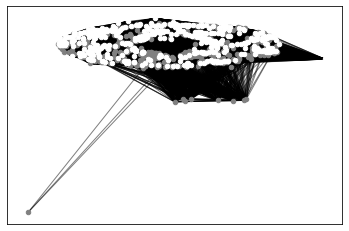

In [15]:
#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [21]:
num_cluster = max([v for k,v in partition.items()]) + 1

In [23]:
num_cluster

2